# Candlestick Long Legged Doji

https://www.investopedia.com/terms/l/long-legged-doji.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'BABA'
start = '2018-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100


## Candlestick with Long Legged Doji

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,True
1,736697.0,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,False
2,736698.0,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,False
3,736699.0,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,True
4,736702.0,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,False


Text(0, 0.5, 'Price')

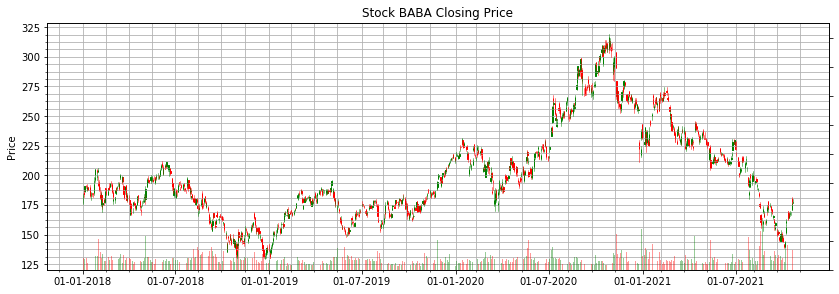

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
long_legged_doji = talib.CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Close'])

long_legged_doji = long_legged_doji[long_legged_doji != 0]

In [6]:
df['long_legged_doji'] = talib.CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['long_legged_doji'] !=0]

,Open,High,Low,Close,Adj Close,Volume,long_legged_doji
Date,,,,,,,
2018-01-18,184.279999,185.845001,182.690002,184.399994,184.399994,14190700,100
2018-02-21,189.369995,193.169998,188.460007,188.820007,188.820007,22071600,100
2018-02-26,194.460007,195.149994,190.649994,194.190002,194.190002,19463100,100
2018-03-12,192.300003,194.399994,190.899994,192.740005,192.740005,17826200,100
2018-04-09,169.750000,172.720001,168.610001,169.869995,169.869995,14717300,100
...,...,...,...,...,...,...,...
2021-09-09,167.300003,169.039993,165.580002,167.320007,167.320007,17295800,100
2021-09-15,157.949997,158.029999,153.919998,157.860001,157.860001,31796600,100
2021-09-28,152.160004,153.729996,148.860001,152.389999,152.389999,26299600,100


In [8]:
df['Adj Close'].loc[df['long_legged_doji'] !=0]

Date
2018-01-18    184.399994
2018-02-21    188.820007
2018-02-26    194.190002
2018-03-12    192.740005
2018-04-09    169.869995
                 ...    
2021-09-09    167.320007
2021-09-15    157.860001
2021-09-28    152.389999
2021-10-18    166.820007
2021-10-21    177.419998
Name: Adj Close, Length: 131, dtype: float64

In [9]:
df['Adj Close'].loc[df['long_legged_doji'] !=0].index

DatetimeIndex(['2018-01-18', '2018-02-21', '2018-02-26', '2018-03-12',
               '2018-04-09', '2018-04-12', '2018-04-20', '2018-04-25',
               '2018-04-27', '2018-05-09',
               ...
               '2021-07-23', '2021-08-05', '2021-08-13', '2021-08-25',
               '2021-08-27', '2021-09-09', '2021-09-15', '2021-09-28',
               '2021-10-18', '2021-10-21'],
              dtype='datetime64[ns]', name='Date', length=131, freq=None)

In [10]:
long_legged_doji

Date
2018-01-18    100
2018-02-21    100
2018-02-26    100
2018-03-12    100
2018-04-09    100
             ... 
2021-09-09    100
2021-09-15    100
2021-09-28    100
2021-10-18    100
2021-10-21    100
Length: 131, dtype: int32

In [11]:
long_legged_doji.index

DatetimeIndex(['2018-01-18', '2018-02-21', '2018-02-26', '2018-03-12',
               '2018-04-09', '2018-04-12', '2018-04-20', '2018-04-25',
               '2018-04-27', '2018-05-09',
               ...
               '2021-07-23', '2021-08-05', '2021-08-13', '2021-08-25',
               '2021-08-27', '2021-09-09', '2021-09-15', '2021-09-28',
               '2021-10-18', '2021-10-21'],
              dtype='datetime64[ns]', name='Date', length=131, freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,long_legged_doji
Date,,,,,,,
2018-01-02,176.399002,184.100006,175.699997,183.649994,183.649994,29916900,0
2018-01-03,185.190002,185.634995,181.399994,184.000000,184.000000,20121900,0
2018-01-04,185.899994,187.746994,184.429993,185.710007,185.710007,19473800,0
2018-01-05,187.169998,190.750000,186.300995,190.699997,190.699997,18168300,0
2018-01-08,190.460007,191.660004,189.070007,190.330002,190.330002,16230100,0
...,...,...,...,...,...,...,...
2021-10-15,166.990005,169.800003,165.434998,168.000000,168.000000,20747300,0
2021-10-18,166.580002,169.250000,166.580002,166.820007,166.820007,18945900,100
2021-10-19,170.600006,177.440002,170.449997,177.000000,177.000000,33538900,0


Text(0, 0.5, 'Price')

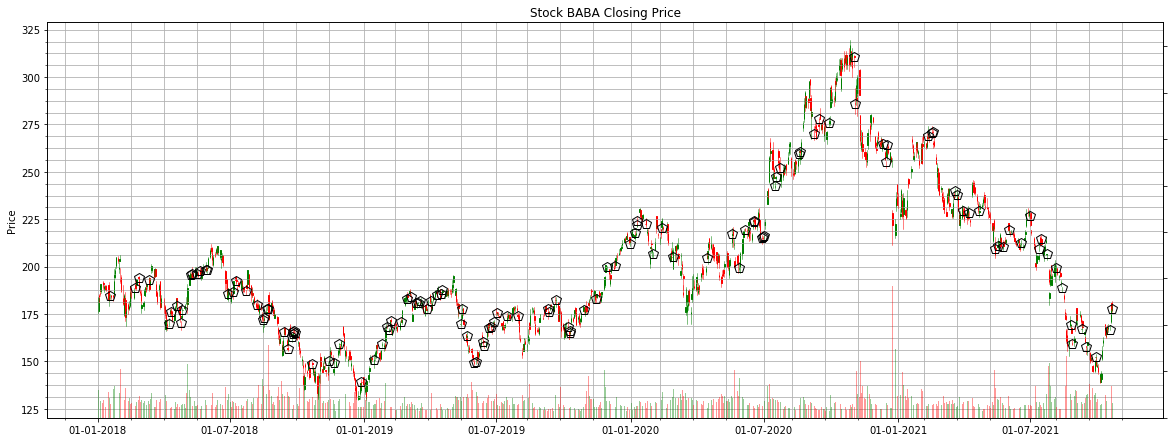

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['long_legged_doji'] !=0].index, df['Adj Close'].loc[df['long_legged_doji'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-10-01':'2021-10-22']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,long_legged_doji,VolumePositive
0,738064.0,147.089996,148.449997,143.339996,144.199997,144.199997,20211000,0,False
1,738067.0,141.699997,141.899994,138.429993,139.630005,139.630005,25218500,0,False
2,738068.0,139.380005,143.830002,139.190002,143.139999,143.139999,14032100,0,True
3,738069.0,140.559998,144.891998,139.960007,144.100006,144.100006,14875900,0,True
4,738070.0,151.050003,158.289993,150.750000,156.000000,156.000000,46035900,0,True


Text(0, 0.5, 'Price')

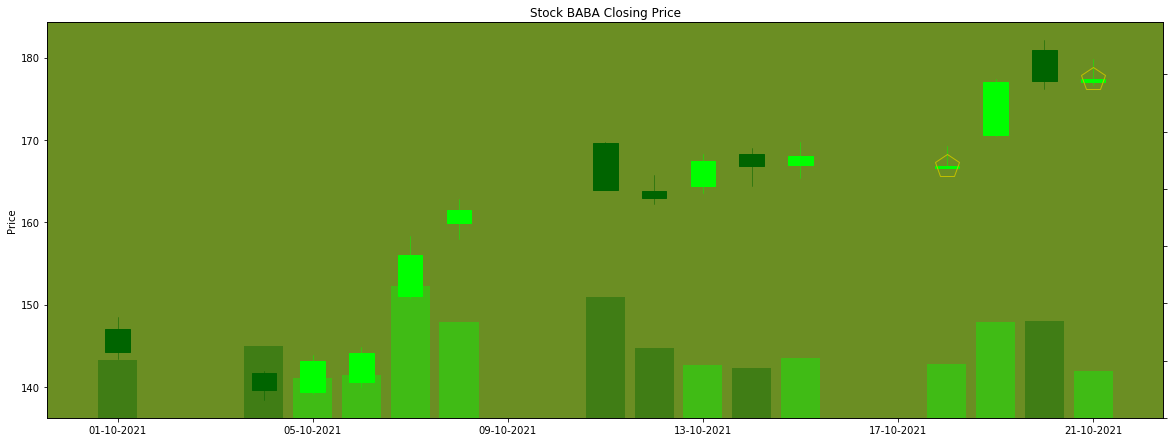

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('olivedrab')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='lime', colordown='darkgreen', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['long_legged_doji'] !=0].index, df['Adj Close'].loc[df['long_legged_doji'] !=0],
                'py', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'lime', False: 'darkgreen'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

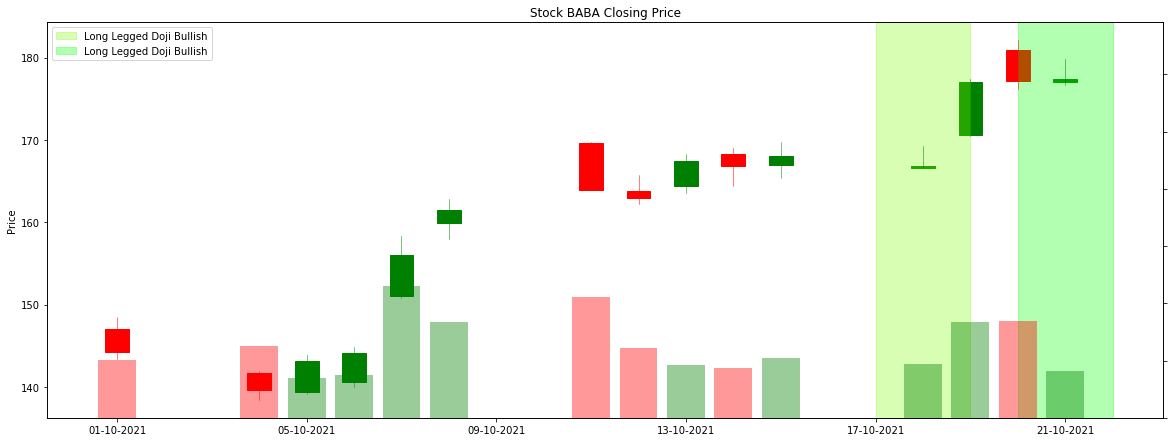

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,10,17)), date2num(datetime(2021,10,19)), 
           label="Long Legged Doji Bullish",color="lawngreen", alpha=0.3)
ax.axvspan(date2num(datetime(2021,10,20)), date2num(datetime(2021,10,22)), 
           label="Long Legged Doji Bullish",color="lime", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')